# 모두의 딥러닝 개정 3판
## 13장 모델 성능 검증하기
## k-fold cross validation(k겹 교차 검증)
데이터양이 많지 않을 때 사용   
현실에서는 충분한 데이터를 확보하지 못하는 경우가 많음   
이럴 때 사용하는 방법   
- 데이터를 겹치지 않게 k등분하여 train set(k-1개), test set(1개)을 나눈 후 k번 돌린다   
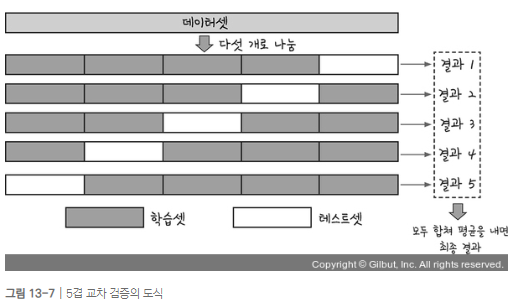

In [1]:
import pandas as pd
from tensorflow.keras import models, layers
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('data/sonar3.csv', header=None)
X = df.iloc[:, :60]
y = df.iloc[:, 60]

In [4]:
k = 5
kfold = KFold(n_splits=k, shuffle=True)
# shuffle=True; 샘플이 한 쪽으로 치우치지는 것 방지

acc_score = []

def model_fn():
    model = models.Sequential()  # 딥러닝 모델의 구조 시작
    model.add(layers.Dense(24, input_dim=60, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    return model

In [5]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
    # verbose=0; 학습 과정 출력 생략(k번 출력하지 마라) default 1임, 
    acc_score.append(model.evaluate(X_test, y_test)[1])

2/2 [==============================] - 0s 0s/step - loss: 0.7844 - accuracy: 0.7317


In [6]:
avg_score = sum(acc_score) / k
print('Accuracy: ', acc_score)
print('Accuracy Average: ', avg_score)

Accuracy:  [0.8571428656578064, 0.8095238208770752, 0.7857142686843872, 0.7804877758026123, 0.7317073345184326]
Accuracy Average:  0.7929152131080628
